In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el dataset
data = pd.read_csv('data.csv')

# Establecemos el ID_Vuelo como indice
data.set_index('ID_Vuelo', inplace=True)

### Plantemos el modelo de ML

In [2]:
# Establecemos la variable dependiente: 'bool' y la independiente: ('temperatura','cobertura_nubes')

y = data['bool']
X = data[['temperatura','cobertura_nubes']]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

from sklearn.preprocessing import RobustScaler # StandardScaler para escalar los datos

sc_X = RobustScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [4]:
from sklearn.svm import SVC 

svc = SVC(kernel='rbf', gamma=0.1, C=0.01) 
# C es el parámetro de regularización, si es muy grande, el modelo es más rígido
# gamma es el parámetro de la función de kernel, si es muy grande, el modelo es más rígido
# kernel es el tipo de kernel, puede ser lineal, polinomial, gaussiano, etc.
# random_state es la semilla para la generación de números aleatorios

In [5]:
svc.fit(X_Train, y_train)

SVC(C=0.01, gamma=0.1)

In [6]:
y_pred = svc.predict(X_Test)

In [7]:
from sklearn.metrics import accuracy_score
print("La precisión del modelo es: ", accuracy_score(y_test,y_pred))

La precisión del modelo es:  0.7384394053572652


In [8]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('la matriz de confusión es: \n', matriz)

la matriz de confusión es: 
 [[5624 1713]
 [2105 5155]]


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      7337
           1       0.75      0.71      0.73      7260

    accuracy                           0.74     14597
   macro avg       0.74      0.74      0.74     14597
weighted avg       0.74      0.74      0.74     14597



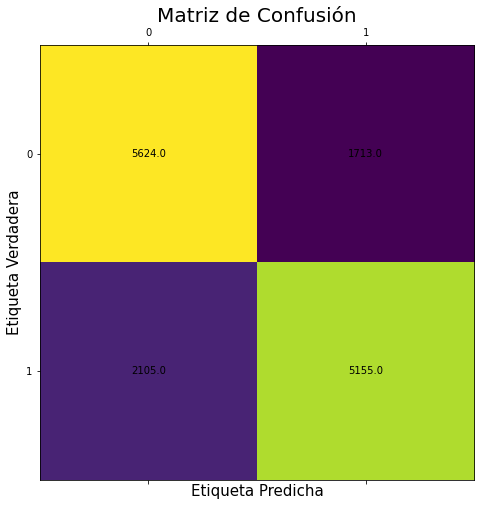

In [10]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

### Optimizando los hiperparámetros

In [11]:
param_grid = {'C': [0.01, 0.1],
              'gamma': [0.1, 0.01],
              'kernel': ['rbf']}

In [12]:
svc = SVC()

from sklearn.model_selection import GridSearchCV

model = GridSearchCV(svc, param_grid=param_grid, refit=True, cv=3, scoring='roc_auc')
# scoring puede ser accuracy, recall, precision, f1, roc_auc 

model.fit(X_Train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf']},
             scoring='roc_auc')

In [13]:
print("Mejores hiperparámetros: "+str(model.best_params_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')
print('El accuracy del modelo es: ', accuracy_score(y_test, model.predict(X_test)))

Mejores hiperparámetros: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}

Mejor Score: 0.8023744890400595



c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


El accuracy del modelo es:  0.47831746249229296


In [14]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,40.389096,1.324188,27.071018,0.516909,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.802380,0.798169,0.806574,0.802374,0.003431,1
1,45.741563,0.689511,32.532497,0.577693,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.797998,0.794717,0.806146,0.799620,0.004805,3
2,39.704271,0.525927,24.542139,0.672878,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.798190,0.798491,0.803507,0.800063,0.002439,2
3,44.079376,0.058072,27.118653,0.160334,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.796150,0.791518,0.802167,0.796611,0.004359,4


### Creamos un modelo de predicción con los mejores hiperparámetros

In [15]:
#Predecimos en los datos de test con el mejor modelo obtenido
prediction = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction)

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


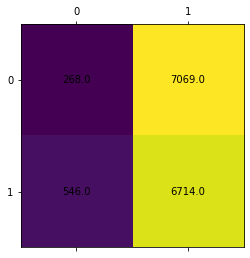

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [17]:
# Reporte de Clasificacion
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.33      0.04      0.07      7337
           1       0.49      0.92      0.64      7260

    accuracy                           0.48     14597
   macro avg       0.41      0.48      0.35     14597
weighted avg       0.41      0.48      0.35     14597



In [18]:
from sklearn.metrics import roc_auc_score
print("El roc_auc_score es: ", roc_auc_score(y_test, prediction))

El roc_auc_score es:  0.48066028968986585
